# Project : Hybrid Optical/RF Channel Model
##              Data Science Research Project Part A
###      4439_MATHS_7097A


The Hybrid Optical/RF Channel Model project first cleaned the data by checking for missing values, finding duplicates, and looking at basic statistics. Skewness of features was addressed by applying logarithmic and square root transformations to them. Interaction terms were engineered to capture complex relationships. To mitigate multicollinearity, highly correlated features were removed based on VIF. Dimensionality reduction, using PCA, retained 90% variance and hence improved the efficiency of the model. Categorical features were encoded, and then Random Forest models were trained to predict FSO_Att and RFL_Att. The performance of the models was evaluated using R² and RMSE for hybrid channel prediction and analysis with promising results.

## 1. Data Cleaning

This part of the section mainly focuses on just understanding the missing or the null values or even the duplicates and also some basic statistics.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
vin_data_res = pd.read_csv("RFLFSODataFull.csv")

Displaying some initial basic information

In [3]:
print("Dataset Overview:")
print(vin_data_res.head())

Dataset Overview:
    FSO_Att   RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
0  7.913289  6.927868         17.595709            17.615907   
1  7.451176  4.412096         17.549693            17.572415   
2  7.072747  6.268740         17.290230            17.644014   
3  6.949288  4.317853         16.820880            17.066776   
4  7.361052  6.114514         16.813820            17.953974   

   AbsoluteHumidityMin     Distance    Frequency  Particulate  ParticulateMax  \
0            17.340148  2115.338398  83500000000          0.0             0.0   
1            17.299439  2113.999257  73500000000          0.0             0.0   
2            16.037894  2118.689047  83500000000          0.0             0.0   
3            15.895622  2114.632339  73500000000          0.0             0.0   
4            15.227225  2116.786055  83500000000          0.0             0.0   

   ParticulateMin  ...  TemperatureMax  TemperatureMin  Time   Visibility  \
0             0.0  ...       26.6

In [4]:
print(vin_data_res.dtypes)

FSO_Att                  float64
RFL_Att                  float64
AbsoluteHumidity         float64
AbsoluteHumidityMax      float64
AbsoluteHumidityMin      float64
Distance                 float64
Frequency                  int64
Particulate              float64
ParticulateMax           float64
ParticulateMin           float64
RainIntensity            float64
RainIntensityMax         float64
RainIntensityMin         float64
RelativeHumidity         float64
SYNOPCode                  int64
Temperature              float64
TemperatureDifference    float64
TemperatureMax           float64
TemperatureMin           float64
Time                       int64
Visibility               float64
VisibilityMax            float64
VisibilityMin            float64
WindDirection            float64
WindSpeed                float64
WindSpeedMax             float64
WindSpeedMin             float64
dtype: object


Checking for missing values , unique and duplicate values , also having an overview of the dataset shape would look good too!!

In [5]:
print(f"The vin_data_resv(Dataset) Shape: {vin_data_res.shape}")

missing_values = vin_data_res.isnull().sum()
print("\n The missing values stated below are :\n", missing_values)


The vin_data_resv(Dataset) Shape: (91379, 27)

 The missing values stated below are :
 FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64


In [6]:
uniq_count_dat = vin_data_res.nunique()
print("\nUnique values in every column:\n", uniq_count_dat)

duplicis = vin_data_res.duplicated().sum()
print(f"\n The duplicate rows goes as : {duplicis}")



Unique values in every column:
 FSO_Att                  91379
RFL_Att                  91041
AbsoluteHumidity         91378
AbsoluteHumidityMax      91379
AbsoluteHumidityMin      91379
Distance                 91252
Frequency                    2
Particulate              32102
ParticulateMax           32103
ParticulateMin           32103
RainIntensity            21914
RainIntensityMax         21915
RainIntensityMin         21915
RelativeHumidity         91194
SYNOPCode                    7
Temperature              91378
TemperatureDifference     3455
TemperatureMax           91379
TemperatureMin           91379
Time                        24
Visibility               91313
VisibilityMax            91379
VisibilityMin            91379
WindDirection            91041
WindSpeed                74445
WindSpeedMax             89136
WindSpeedMin             74447
dtype: int64

 The duplicate rows goes as : 0


Summary for the dataset so that we can know a quick statistics on the numerical features.

In [7]:
print("\n The summary for the numerical features follows as below : \n")
print(vin_data_res.describe())



 The summary for the numerical features follows as below : 

            FSO_Att       RFL_Att  AbsoluteHumidity  AbsoluteHumidityMax  \
count  91379.000000  91379.000000      91379.000000         91379.000000   
mean       6.769458     11.619098          9.553919            10.032760   
std        3.903843      3.438873          5.858577             6.162798   
min        0.788363      0.027142          1.141556             1.238270   
25%        3.473063     10.829331          4.958993             5.205861   
50%        6.336167     11.856560          6.870737             7.205499   
75%        8.664984     12.847944         14.049470            14.782679   
max       32.455222     46.893150         24.790883            26.407305   

       AbsoluteHumidityMin      Distance     Frequency   Particulate  \
count         91379.000000  91379.000000  9.137900e+04  91379.000000   
mean              9.076251   3297.930328  7.850005e+10     27.065979   
std               5.575927   1224.305

Checking if any categorical data has been hidden or present in the dataset

In [8]:
cat_clm = vin_data_res.select_dtypes(include=['object']).columns

if not cat_clm.empty:
    print("\nThe categorical features are : \n")
    for col in cat_clm:
        print(f"{col}:\n")
        # Handling missing values by replacing NaN with 'N/A'
        print(vin_data_res[col].fillna('N/A').value_counts())
        print("\n")
else:
    print("No categorical features were found in your dataset.")



No categorical features were found in your dataset.


## 2. Exploratory Data Analysis (EDA)

In this section its all about the visualization of the dataset and how the relationship between the features acts and gives a desired path.

creating numerical columns

In [9]:
num_clm = vin_data_res.select_dtypes(include=['int64', 'float64']).columns

And the visualisation of the numerical data goes with histogram and box plots.

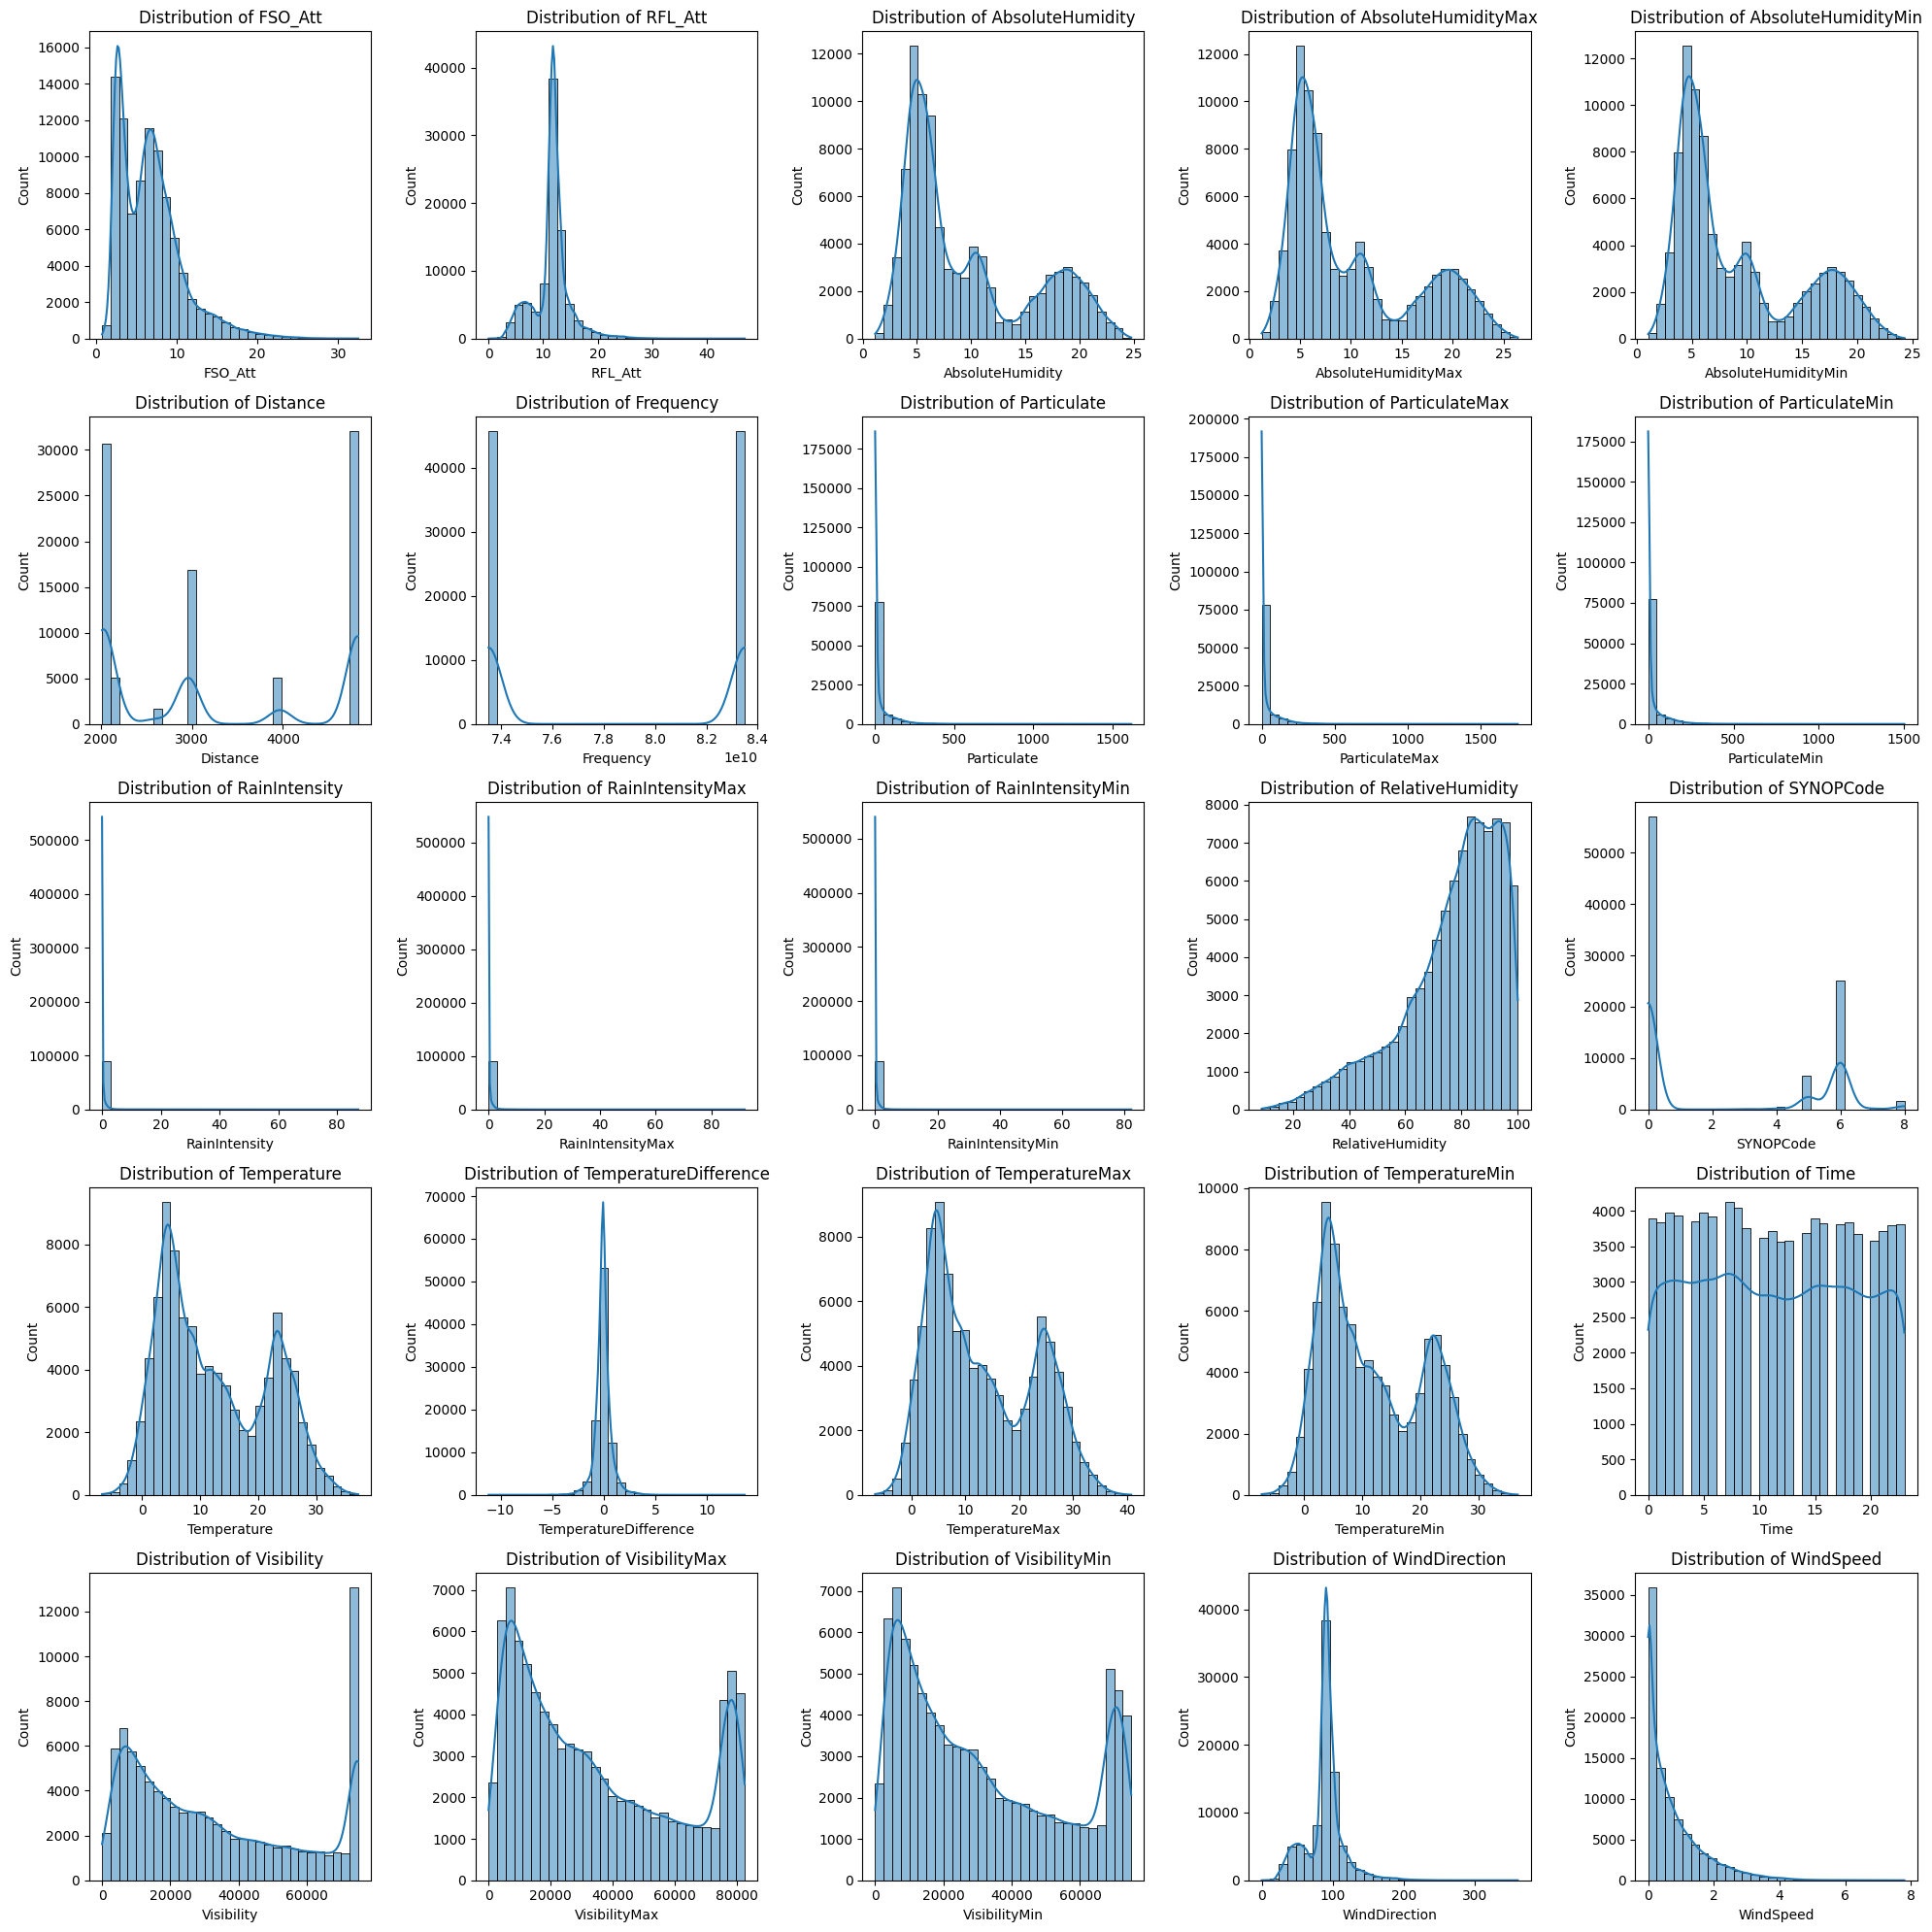

In [10]:
# Getting the grid size in the user(me) desired number or value
grid_size = (5, 5)


# Ready for plotiing the histogram through vin_data_res
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(num_clm):
    if i >= len(axes):
        break
    sns.histplot(vin_data_res[col].dropna(), kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")



# Extra (optionally removing unused axes , like i know its unnecessary but still, works for me!)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Further just getting to know how the correlation exists between features through heatmap , using contrast summer because its SUMMER!!!

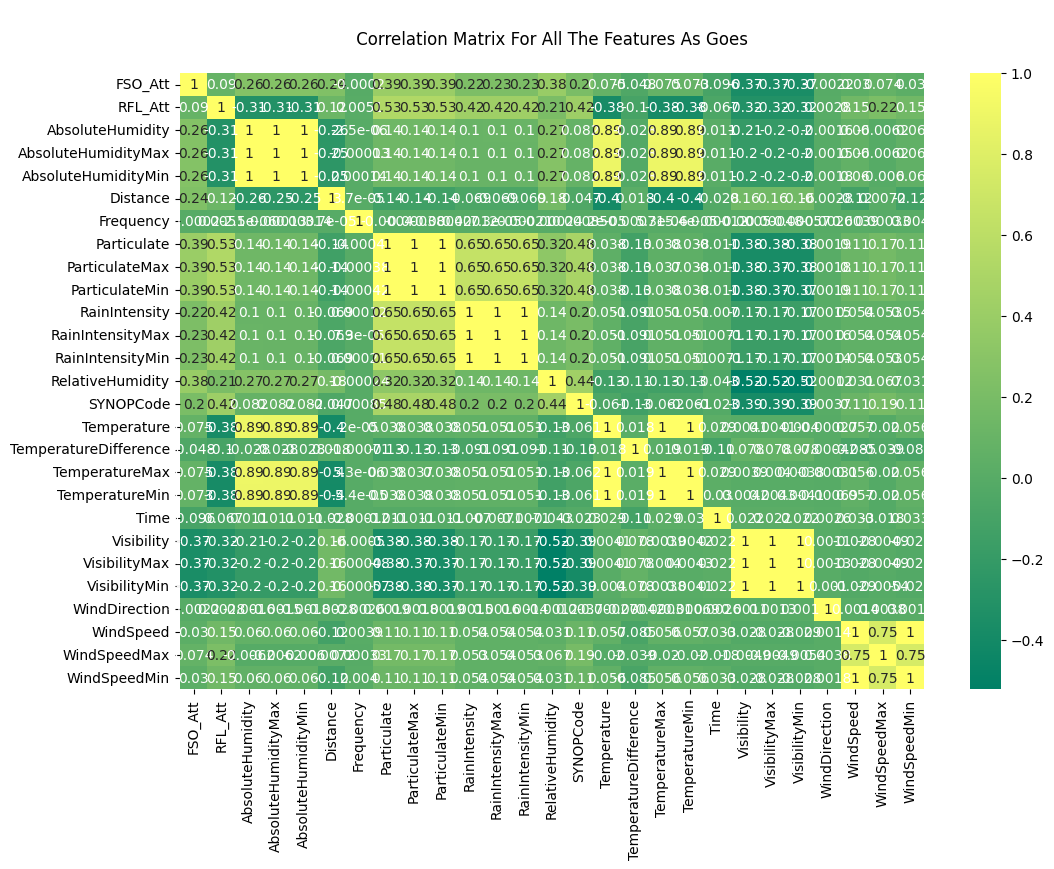

In [11]:
plt.figure(figsize=(12, 8))
cor_matr_ = vin_data_res.corr()
sns.heatmap(cor_matr_, annot=True, cmap='summer')
plt.title("\n Correlation Matrix For All The Features As Goes \n")
plt.show()

Box Plot as i mentioned earlier , so here i have used the custom desired layout (keeping it simple)

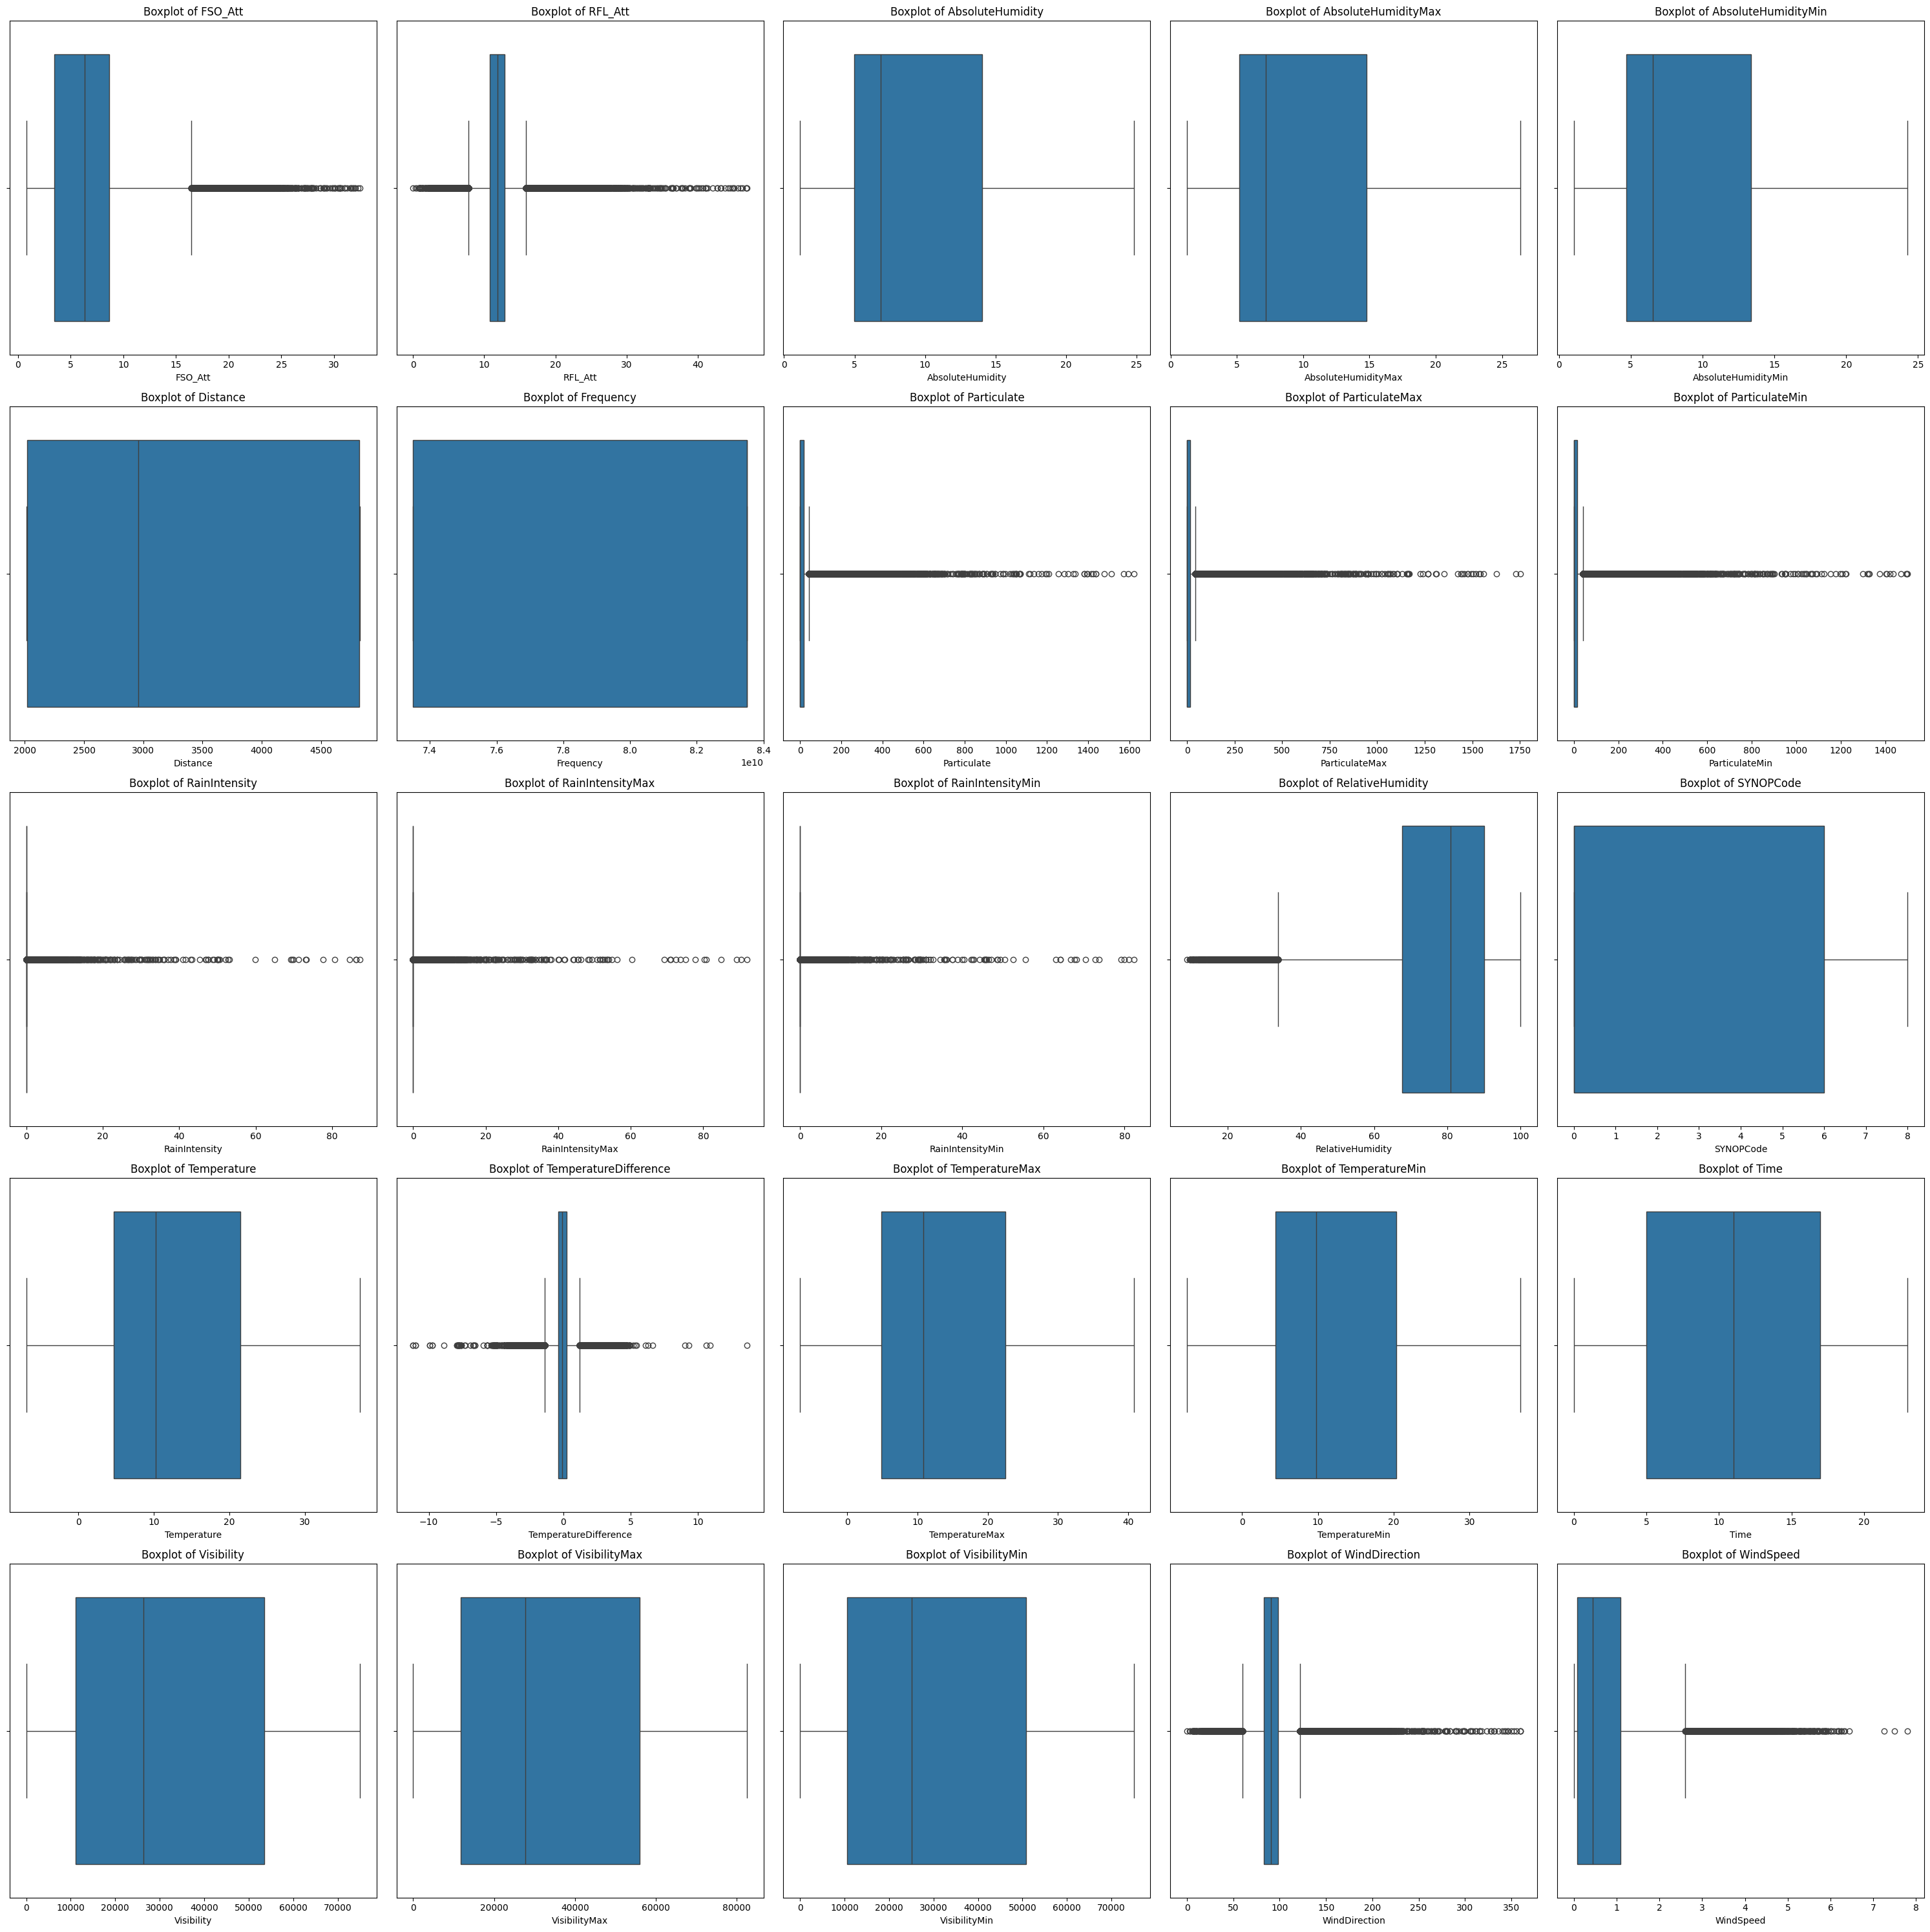

In [12]:
#Taking the plot into a grid manner
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(30, 30))
axes = axes.flatten()

for i, col in enumerate(num_clm):
    if i >= len(axes):
        break
    sns.boxplot(x=vin_data_res[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3. Handling Skewness

Checking and if any reducing the skewness depending on the features

In [13]:
from scipy.stats import skew, kurtosis

print("Skewness for Each Numerical Column:\n")
for col in num_clm:
    col_skew = skew(vin_data_res[col].dropna())
    print(f"{col} - \n Skewness: {col_skew:.4f} \n")


Skewness for Each Numerical Column:

FSO_Att - 
 Skewness: 1.3135 

RFL_Att - 
 Skewness: 0.7888 

AbsoluteHumidity - 
 Skewness: 0.8371 

AbsoluteHumidityMax - 
 Skewness: 0.8437 

AbsoluteHumidityMin - 
 Skewness: 0.8441 

Distance - 
 Skewness: 0.2442 

Frequency - 
 Skewness: -0.0000 

Particulate - 
 Skewness: 6.0893 

ParticulateMax - 
 Skewness: 6.0988 

ParticulateMin - 
 Skewness: 6.1012 

RainIntensity - 
 Skewness: 25.6999 

RainIntensityMax - 
 Skewness: 25.3949 

RainIntensityMin - 
 Skewness: 25.4042 

RelativeHumidity - 
 Skewness: -1.0675 

SYNOPCode - 
 Skewness: 0.5799 

Temperature - 
 Skewness: 0.3975 

TemperatureDifference - 
 Skewness: -0.0245 

TemperatureMax - 
 Skewness: 0.4062 

TemperatureMin - 
 Skewness: 0.4004 

Time - 
 Skewness: 0.0301 

Visibility - 
 Skewness: 0.5240 

VisibilityMax - 
 Skewness: 0.5298 

VisibilityMin - 
 Skewness: 0.5300 

WindDirection - 
 Skewness: 0.7888 

WindSpeed - 
 Skewness: 1.7574 

WindSpeedMax - 
 Skewness: 1.5261 

WindS

Checking for kurtosis (not necessary but still just want have it along with cause my main priority was skewness so yeah)

In [14]:
print("\nKurtosis for Each Numerical Column:\n")
for col in num_clm:
    col_kurt = kurtosis(vin_data_res[col].dropna())
    print(f"{col} - \n Kurtosis: {col_kurt:.4f}\n")



Kurtosis for Each Numerical Column:

FSO_Att - 
 Kurtosis: 2.6038

RFL_Att - 
 Kurtosis: 5.8888

AbsoluteHumidity - 
 Kurtosis: -0.6882

AbsoluteHumidityMax - 
 Kurtosis: -0.6648

AbsoluteHumidityMin - 
 Kurtosis: -0.6614

Distance - 
 Kurtosis: -1.6975

Frequency - 
 Kurtosis: -2.0000

Particulate - 
 Kurtosis: 64.2775

ParticulateMax - 
 Kurtosis: 64.7435

ParticulateMin - 
 Kurtosis: 64.5988

RainIntensity - 
 Kurtosis: 951.1643

RainIntensityMax - 
 Kurtosis: 928.0745

RainIntensityMin - 
 Kurtosis: 928.0202

RelativeHumidity - 
 Kurtosis: 0.6775

SYNOPCode - 
 Kurtosis: -1.5583

Temperature - 
 Kurtosis: -1.0920

TemperatureDifference - 
 Kurtosis: 11.3638

TemperatureMax - 
 Kurtosis: -1.0822

TemperatureMin - 
 Kurtosis: -1.0714

Time - 
 Kurtosis: -1.2148

Visibility - 
 Kurtosis: -1.1240

VisibilityMax - 
 Kurtosis: -1.1090

VisibilityMin - 
 Kurtosis: -1.1074

WindDirection - 
 Kurtosis: 5.8888

WindSpeed - 
 Kurtosis: 3.5875

WindSpeedMax - 
 Kurtosis: 2.9041

WindSpeedMin 

Here i am using log transformation for highly skewed columns- using (log(1 + x)) to handle zeros

In [15]:

hi_gh_skew_col = [
    'Particulate', 'ParticulateMax', 'ParticulateMin',
    'RainIntensity', 'RainIntensityMax', 'RainIntensityMin',
    'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'
]

for col in hi_gh_skew_col:
    vin_data_res[col] = np.log1p(vin_data_res[col])


for moderately skewed columns i am using square root transformation

In [16]:

mod_skew_col = [
    'FSO_Att', 'RFL_Att', 'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'
]

for col in mod_skew_col:
    vin_data_res[col] = np.sqrt(vin_data_res[col])


Check or applying skewness again

In [17]:
ske_w_1 = vin_data_res.skew(numeric_only=True)
print(ske_w_1)


FSO_Att                  0.524154
RFL_Att                 -0.353080
AbsoluteHumidity         0.837104
AbsoluteHumidityMax      0.843732
AbsoluteHumidityMin      0.844140
Distance                 0.244208
Frequency               -0.000022
Particulate              1.005035
ParticulateMax           0.998400
ParticulateMin           1.012711
RainIntensity            4.569883
RainIntensityMax         4.496131
RainIntensityMin         4.647117
RelativeHumidity        -1.067511
SYNOPCode                0.579932
Temperature              0.397482
TemperatureDifference   -0.024548
TemperatureMax           0.406193
TemperatureMin           0.400452
Time                     0.030113
Visibility               0.524035
VisibilityMax            0.529773
VisibilityMin            0.529962
WindDirection            0.788855
WindSpeed               -0.134442
WindSpeedMax            -0.512462
WindSpeedMin            -0.120291
dtype: float64


It has significantly reduced with most of the features!!!

Also using quantile transformation to ensure skewed distributions are brought closer to normality.

In [18]:
from sklearn.preprocessing import QuantileTransformer

transf_1 = QuantileTransformer(output_distribution='normal', random_state=42)
for col in ['RainIntensity', 'RainIntensityMax', 'RainIntensityMin']:
    vin_data_res[col] = transf_1.fit_transform(vin_data_res[[col]])


In [19]:
ske_w_2 = vin_data_res.skew(numeric_only=True)
print(ske_w_2)


FSO_Att                  0.524154
RFL_Att                 -0.353080
AbsoluteHumidity         0.837104
AbsoluteHumidityMax      0.843732
AbsoluteHumidityMin      0.844140
Distance                 0.244208
Frequency               -0.000022
Particulate              1.005035
ParticulateMax           0.998400
ParticulateMin           1.012711
RainIntensity            1.245482
RainIntensityMax         1.245569
RainIntensityMin         1.245466
RelativeHumidity        -1.067511
SYNOPCode                0.579932
Temperature              0.397482
TemperatureDifference   -0.024548
TemperatureMax           0.406193
TemperatureMin           0.400452
Time                     0.030113
Visibility               0.524035
VisibilityMax            0.529773
VisibilityMin            0.529962
WindDirection            0.788855
WindSpeed               -0.134442
WindSpeedMax            -0.512462
WindSpeedMin            -0.120291
dtype: float64


Visualisation after Quantile transformation

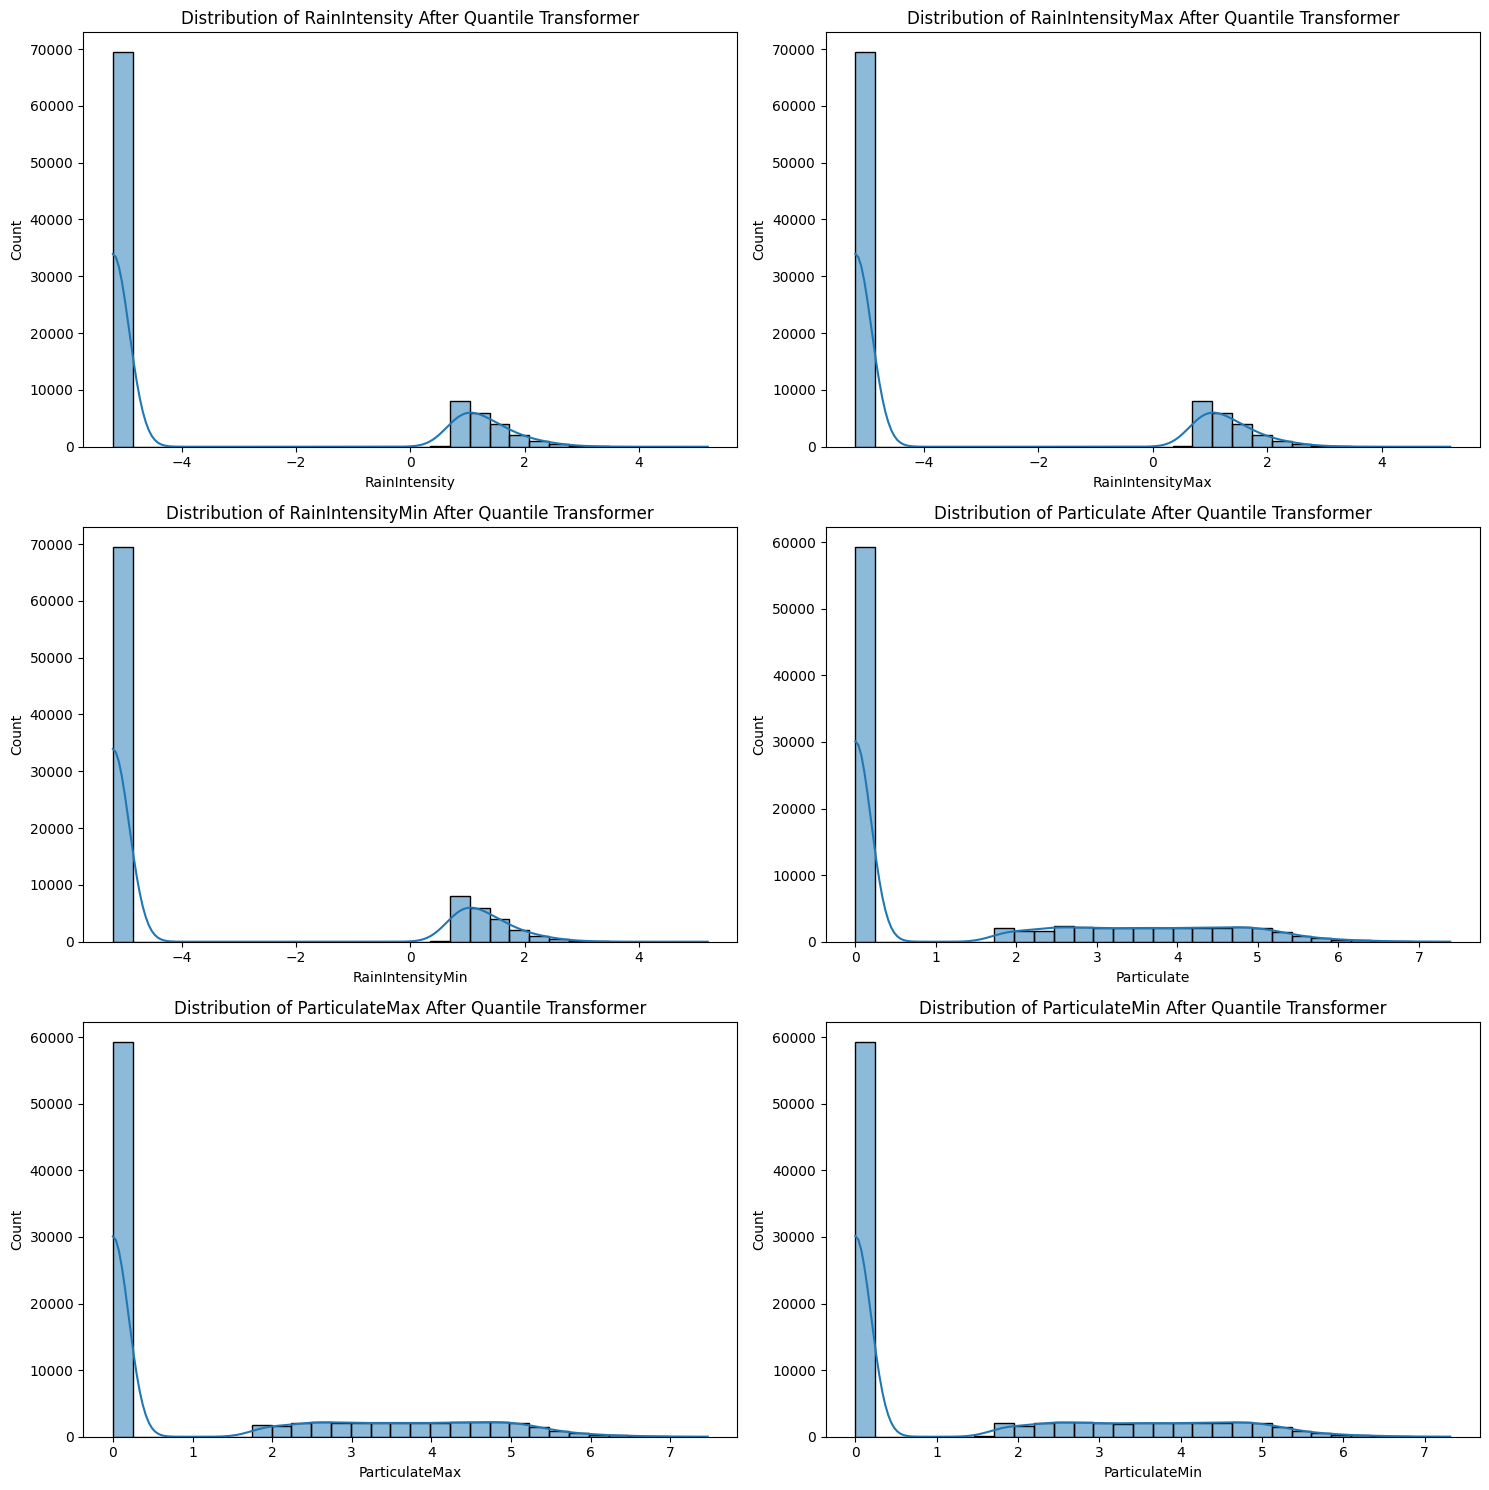

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

clm__visliz = ['RainIntensity', 'RainIntensityMax', 'RainIntensityMin',
                        'Particulate', 'ParticulateMax', 'ParticulateMin']


# Generating grid pattern
num_cols = len(clm__visliz)
n_rows = 3
n_cols = 2

# Using flatten to ease up the congestion
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(clm__visliz):
    sns.histplot(vin_data_res[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} After Quantile Transformer")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting the layout to prevent overlaping
plt.tight_layout()
plt.show()

## 4. Feature Engineering

Using standard scale first and then creating interaction terms because wanted to keep the original features and the interaction terms are on the same scale.

In [21]:
from sklearn.preprocessing import StandardScaler

num_col_1 = [col for col in vin_data_res.select_dtypes(include=['float64', 'int64']).columns if col not in ['FSO_Att', 'RFL_Att', 'SYNOPCode']]
scale_1 = StandardScaler()
vin_data_res[num_col_1] = scale_1.fit_transform(vin_data_res[num_col_1])



checking the mean and standard deviation

In [22]:
print(vin_data_res[num_col_1].mean())
print(vin_data_res[num_col_1].std())


AbsoluteHumidity         0.000000e+00
AbsoluteHumidityMax     -4.976497e-17
AbsoluteHumidityMin      5.971797e-17
Distance                -2.985898e-17
Frequency                3.634471e-16
Particulate              6.967096e-17
ParticulateMax          -7.464746e-18
ParticulateMin           7.962396e-17
RainIntensity            1.119712e-16
RainIntensityMax         4.043404e-16
RainIntensityMin        -1.492949e-17
RelativeHumidity        -7.673137e-16
Temperature             -3.384018e-16
TemperatureDifference    9.486448e-18
TemperatureMax          -1.990599e-17
TemperatureMin           8.957695e-17
Time                    -6.834908e-17
Visibility               1.928393e-16
VisibilityMax           -9.206520e-17
VisibilityMin            1.269007e-16
WindDirection           -2.581558e-17
WindSpeed               -3.483548e-16
WindSpeedMax            -2.712191e-16
WindSpeedMin            -1.741774e-17
dtype: float64
AbsoluteHumidity         1.000005
AbsoluteHumidityMax      1.000005
Absol

In [23]:
print(vin_data_res[num_col_1].describe())


       AbsoluteHumidity  AbsoluteHumidityMax  AbsoluteHumidityMin  \
count      91379.000000         9.137900e+04         9.137900e+04   
mean           0.000000        -4.976497e-17         5.971797e-17   
std            1.000005         1.000005e+00         1.000005e+00   
min           -1.435913        -1.427037e+00        -1.439501e+00   
25%           -0.784312        -7.832360e-01        -7.831457e-01   
50%           -0.457995        -4.587650e-01        -4.577210e-01   
75%            0.767349         7.707449e-01         7.717155e-01   
max            2.600810         2.657013e+00         2.724617e+00   

           Distance     Frequency   Particulate  ParticulateMax  \
count  9.137900e+04  9.137900e+04  9.137900e+04    9.137900e+04   
mean  -2.985898e-17  3.634471e-16  6.967096e-17   -7.464746e-18   
std    1.000005e+00  1.000005e+00  1.000005e+00    1.000005e+00   
min   -1.050340e+00 -1.000011e+00 -6.872071e-01   -6.881291e-01   
25%   -1.044270e+00 -1.000011e+00 -6.872071

Creating interaction terms

In [24]:

vin_data_res['Rain_Temp_Interaction'] = vin_data_res['RainIntensity'] * vin_data_res['Temperature']
vin_data_res['Wind_Vis_Interaction'] = vin_data_res['WindSpeed'] * vin_data_res['Visibility']
vin_data_res['Humidity_Temp_Interaction'] = vin_data_res['RelativeHumidity'] * vin_data_res['Temperature']
vin_data_res['Rain_Particulate_Interaction'] = vin_data_res['RainIntensity'] * vin_data_res['Particulate']
vin_data_res['Temp_Wind_Interaction'] = vin_data_res['Temperature'] * vin_data_res['WindSpeed']
vin_data_res['Time_Temp_Interaction'] = vin_data_res['Time'] * vin_data_res['Temperature']
vin_data_res['Time_Rain_Interaction'] = vin_data_res['Time'] * vin_data_res['RainIntensity']
vin_data_res['Distance_Rain_Interaction'] = vin_data_res['Distance'] * vin_data_res['RainIntensity']
vin_data_res['Distance_Vis_Interaction'] = vin_data_res['Distance'] * vin_data_res['Visibility']


Creating under one roof

In [25]:
inter_cols = [
    'Rain_Temp_Interaction', 'Wind_Vis_Interaction', 'Humidity_Temp_Interaction',
    'Rain_Particulate_Interaction', 'Temp_Wind_Interaction', 'Time_Temp_Interaction',
    'Time_Rain_Interaction', 'Distance_Rain_Interaction', 'Distance_Vis_Interaction'
]
vin_data_res[inter_cols] = scale_1.fit_transform(vin_data_res[inter_cols])


In [26]:
print(vin_data_res[inter_cols].mean())
print(vin_data_res[inter_cols].std())


Rain_Temp_Interaction          -9.952995e-18
Wind_Vis_Interaction           -1.990599e-17
Humidity_Temp_Interaction      -4.043404e-17
Rain_Particulate_Interaction    8.086808e-17
Temp_Wind_Interaction          -9.952995e-18
Time_Temp_Interaction          -3.343584e-18
Time_Rain_Interaction          -3.129750e-18
Distance_Rain_Interaction      -2.488249e-18
Distance_Vis_Interaction       -2.488249e-18
dtype: float64
Rain_Temp_Interaction           1.000005
Wind_Vis_Interaction            1.000005
Humidity_Temp_Interaction       1.000005
Rain_Particulate_Interaction    1.000005
Temp_Wind_Interaction           1.000005
Time_Temp_Interaction           1.000005
Time_Rain_Interaction           1.000005
Distance_Rain_Interaction       1.000005
Distance_Vis_Interaction        1.000005
dtype: float64


Checking the correlation interms of the target variable FSO_Att

In [27]:
corr_fso_targ = vin_data_res.corr()['FSO_Att'].sort_values(ascending=False)
print(corr_fso_targ)


FSO_Att                         1.000000
RelativeHumidity                0.413418
ParticulateMin                  0.329885
Particulate                     0.329031
ParticulateMax                  0.328239
AbsoluteHumidity                0.307202
AbsoluteHumidityMax             0.306920
AbsoluteHumidityMin             0.306602
Distance                        0.273524
Rain_Particulate_Interaction    0.260651
RainIntensityMax                0.218533
RainIntensity                   0.218532
RainIntensityMin                0.218527
SYNOPCode                       0.210803
TemperatureMax                  0.103385
Temperature                     0.102714
TemperatureMin                  0.101667
WindSpeedMax                    0.062486
WindSpeed                       0.047007
WindSpeedMin                    0.046687
Time_Temp_Interaction           0.034634
Temp_Wind_Interaction           0.034115
Distance_Rain_Interaction       0.028566
Frequency                      -0.000123
WindDirection   

Checking the correlation interms of the target variable RFL_Att

In [28]:
corr_rfl_targ = vin_data_res.corr()['RFL_Att'].sort_values(ascending=False)
print(corr_rfl_targ)


RFL_Att                         1.000000
Rain_Particulate_Interaction    0.519641
RainIntensityMax                0.508934
RainIntensity                   0.508906
RainIntensityMin                0.508897
ParticulateMin                  0.483754
Particulate                     0.483349
ParticulateMax                  0.482961
SYNOPCode                       0.392367
WindSpeedMax                    0.190908
RelativeHumidity                0.182595
Distance                        0.141914
WindSpeedMin                    0.123064
WindSpeed                       0.122482
Distance_Vis_Interaction        0.097769
Time_Temp_Interaction           0.044044
Rain_Temp_Interaction           0.039093
Temp_Wind_Interaction           0.017388
Wind_Vis_Interaction            0.012830
Frequency                       0.007878
WindDirection                   0.003018
FSO_Att                        -0.017680
Time_Rain_Interaction          -0.037589
Time                           -0.069337
Distance_Rain_In

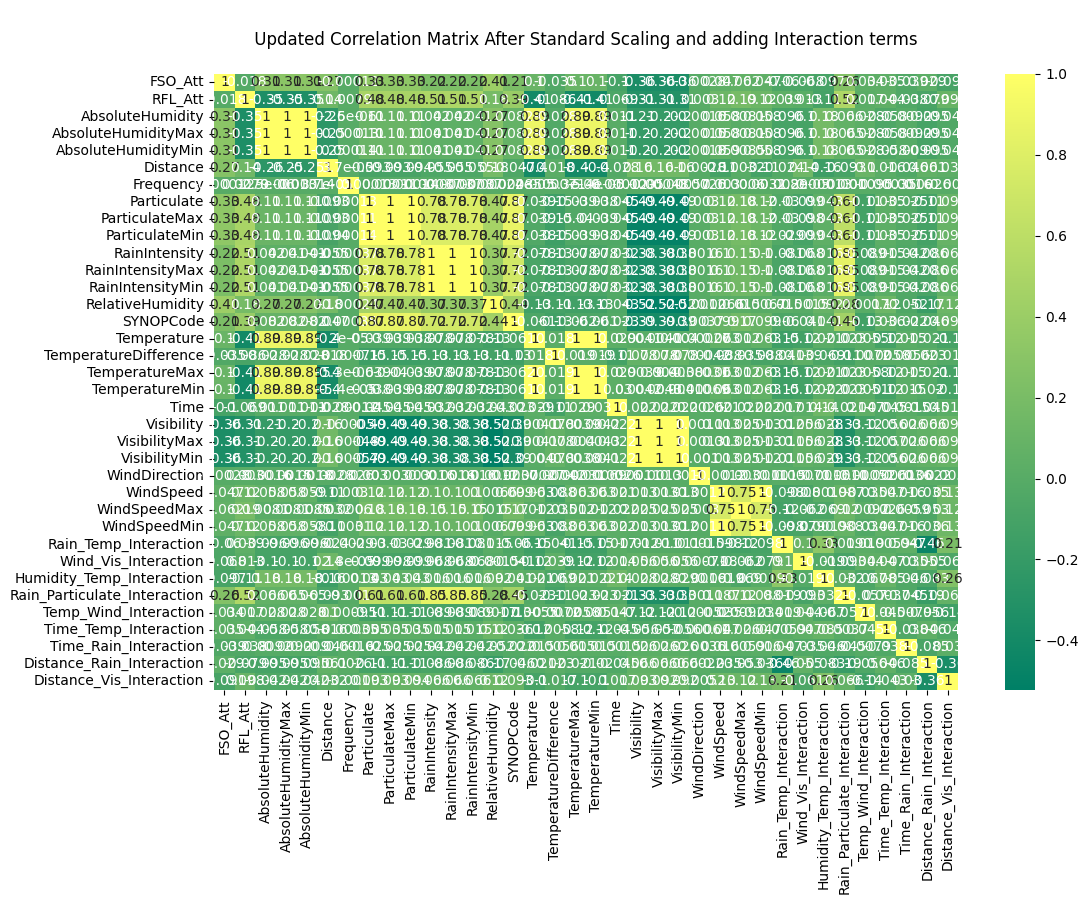

In [29]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
cor_matr_2 = vin_data_res.corr()
sns.heatmap(cor_matr_2, annot=True, cmap='summer')
plt.title("\n Updated Correlation Matrix After Standard Scaling and adding Interaction terms \n ")
plt.show()

## 5. Removing Multicollinearity

Removing the highly correlated features by VIF(variance inflation factor)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Function to calculate VIF
def calculate_vif(vin_data_res, features):
    v_i_f_data = pd.DataFrame()
    v_i_f_data['Feature'] = features
    v_i_f_data['VIF'] = [variance_inflation_factor(vin_data_res[features].values, i) for i in range(len(features))]
    return v_i_f_data

# Define numerical features excluding target variables and SYNOPCode
v_i_f_feat = [col for col in vin_data_res.columns if col not in ['FSO_Att', 'RFL_Att', 'SYNOPCode']]

# Calculate VIF
vif_vin_data_res = calculate_vif(vin_data_res, v_i_f_feat)
print(vif_vin_data_res)


                         Feature            VIF
0               AbsoluteHumidity     708.434331
1            AbsoluteHumidityMax     362.921703
2            AbsoluteHumidityMin     297.712913
3                       Distance       1.963309
4                      Frequency       1.000085
5                    Particulate   27152.603683
6                 ParticulateMax   14100.242845
7                 ParticulateMin   11103.420330
8                  RainIntensity  501757.639422
9               RainIntensityMax  186341.655957
10              RainIntensityMin  257895.249173
11              RelativeHumidity       7.860605
12                   Temperature     886.325650
13         TemperatureDifference       1.057927
14                TemperatureMax     457.743964
15                TemperatureMin     376.465822
16                          Time       1.080365
17                    Visibility     865.573517
18                 VisibilityMax     480.525571
19                 VisibilityMin     393

Removing the features which are having high VIF

In [31]:

hi_vif_fea = [
    'RainIntensity', 'RainIntensityMax', 'RainIntensityMin',
    'Particulate', 'ParticulateMax', 'ParticulateMin',
    'AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin',
    'Temperature', 'TemperatureMax', 'TemperatureMin',
    'Visibility', 'VisibilityMax', 'VisibilityMin',
    'WindSpeed', 'WindSpeedMin'
]

# Drop high VIF features
vin_data_res_reduced = vin_data_res.drop(columns=hi_vif_fea)

# Recalculate VIF for the remaining features
rem_feat = [col for col in vin_data_res_reduced.columns if col not in ['FSO_Att', 'RFL_Att', 'SYNOPCode']]
vif_vin_data_res_red = calculate_vif(vin_data_res_reduced, rem_feat)
print(vif_vin_data_res_red)


                         Feature       VIF
0                       Distance  1.143443
1                      Frequency  1.000024
2               RelativeHumidity  1.223881
3          TemperatureDifference  1.041643
4                           Time  1.051931
5                  WindDirection  1.000099
6                   WindSpeedMax  1.066540
7          Rain_Temp_Interaction  1.512891
8           Wind_Vis_Interaction  1.059833
9      Humidity_Temp_Interaction  1.314490
10  Rain_Particulate_Interaction  1.167217
11         Temp_Wind_Interaction  1.059638
12         Time_Temp_Interaction  1.039968
13         Time_Rain_Interaction  1.021068
14     Distance_Rain_Interaction  1.581194
15      Distance_Vis_Interaction  1.306102


Scaling again for the reduced data

In [32]:
from sklearn.preprocessing import StandardScaler


num_col_stdize = [col for col in vin_data_res_reduced.columns if col not in ['FSO_Att', 'RFL_Att', 'SYNOPCode']]


scaler_2 = StandardScaler()
scale_feat_1 = scaler_2.fit_transform(vin_data_res_reduced[num_col_stdize])


vin_data_res_scaled = vin_data_res_reduced.copy()
vin_data_res_scaled[num_col_stdize] = scale_feat_1


## 6. Dimensionality Reduction Using PCA

Reducing the features dimensions while retaining the 90% of variance.

In [33]:
from sklearn.decomposition import PCA
import numpy as np


X = vin_data_res[num_col_stdize]
pca = PCA()
X_pca = pca.fit_transform(X)

# Find the number of components for 90% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1  # Index starts at 0, so add 1
print(f"Number of components to retain 90% variance: {n_components_90}")

# Reapply PCA with optimal number of components
pca = PCA(n_components=n_components_90)
X_pca_90 = pca.fit_transform(X)

# Add PCA components back into the DataFrame
pca_cols = [f"PC{i+1}" for i in range(X_pca_90.shape[1])]
vin_data_res_pca = pd.DataFrame(X_pca_90, columns=pca_cols)
vin_data_res_pca['FSO_Att'] = vin_data_res['FSO_Att']
vin_data_res_pca['RFL_Att'] = vin_data_res['RFL_Att']
vin_data_res_pca['SYNOPCode'] = vin_data_res['SYNOPCode']

# Debugging information
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (90% Variance Retained): {explained_variance}")
print(f"Cumulative Explained Variance (90% Variance Retained): {np.cumsum(explained_variance)}")


Number of components to retain 90% variance: 13
Explained Variance Ratio (90% Variance Retained): [0.12469149 0.08759146 0.08261311 0.07460284 0.06967906 0.06397352
 0.06267462 0.06236006 0.06214156 0.05916926 0.05559271 0.05248648
 0.04488732]
Cumulative Explained Variance (90% Variance Retained): [0.12469149 0.21228295 0.29489606 0.3694989  0.43917796 0.50315147
 0.56582609 0.62818615 0.69032771 0.74949697 0.80508968 0.85757616
 0.90246349]


In [34]:
pca.components_

array([[ 9.05440064e-02,  3.43815893e-03, -2.51861648e-01,
         1.35889015e-01, -8.93271728e-02,  2.93291142e-03,
        -3.98541324e-02, -4.61824650e-01,  6.19305774e-02,
        -3.80110034e-01, -2.52337019e-01,  7.19141162e-02,
        -1.03092701e-02, -4.36471075e-02,  5.15199183e-01,
        -4.49917046e-01],
       [ 1.91442450e-01,  2.38747828e-03,  4.97982473e-01,
        -1.82117110e-01, -1.91808520e-01,  5.80775410e-04,
         3.74460344e-01, -3.52473188e-01, -1.82508083e-01,
        -2.49907707e-01,  4.92249931e-01, -1.14255737e-02,
         1.39653507e-01, -1.51265591e-01,  1.61852903e-02,
         9.60285618e-03],
       [ 5.59266931e-01, -6.80703872e-04,  2.95842819e-01,
         5.27202939e-02, -4.13612633e-02, -5.20205471e-03,
        -1.95688863e-01,  2.14907640e-01,  5.05588745e-01,
        -1.73278413e-02, -1.47195910e-01,  3.57207744e-01,
         2.69713742e-01, -1.62358500e-01, -5.32701677e-02,
        -5.97716974e-02],
       [-2.23896631e-01,  8.77250044e

## 7. Modeling with Random Forest

After dimensionality we further move on with modeling, here considering the random forest model with out of the bag feature selection.


In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Results list to store the evaluation metrics for each SYNOPCode
res_method1 = []


# Loop through each unique SYNOPCode
for code in vin_data_res['SYNOPCode'].unique():
    print(f"Processing SYNOPCode {code}...")

    # Filter the data for the current SYNOPCode
    subset_1 = vin_data_res_pca[vin_data_res_pca['SYNOPCode'] == code]
    X_sub_set = subset_1.drop(columns=['FSO_Att', 'RFL_Att', 'SYNOPCode'])  # Use PCA-transformed features
    y_fso_sub_set_ = subset_1['FSO_Att']
    y_rfl_sub_set_ = subset_1['RFL_Att']

    # Train-test split for the current SYNOPCode
    X_train, X_test, y_train_fso, y_test_fso = train_test_split(X_sub_set, y_fso_sub_set_, test_size=0.2, random_state=42)
    X_train_rfl, X_test_rfl, y_train_rfl, y_test_rfl = train_test_split(X_sub_set, y_rfl_sub_set_, test_size=0.2, random_state=42)

    # Train Random Forest for FSO_Att with OOB enabled
    rf_fso = RandomForestRegressor(oob_score=True, random_state=42, n_estimators=100)
    rf_fso.fit(X_train, y_train_fso)
    y_pred_fso = rf_fso.predict(X_test)
    oob_score_fso = rf_fso.oob_score_

    # Train Random Forest for RFL_Att with OOB enabled
    rf_rfl = RandomForestRegressor(oob_score=True, random_state=42, n_estimators=100)
    rf_rfl.fit(X_train_rfl, y_train_rfl)
    y_pred_rfl = rf_rfl.predict(X_test_rfl)
    oob_score_rfl = rf_rfl.oob_score_

    # Evaluate FSO_Att model
    r2_fso = r2_score(y_test_fso, y_pred_fso)
    rmse_fso = mean_squared_error(y_test_fso, y_pred_fso, squared=False)

    # Evaluate RFL_Att model
    r2_rfl = r2_score(y_test_rfl, y_pred_rfl)
    rmse_rfl = mean_squared_error(y_test_rfl, y_pred_rfl, squared=False)

    # Append results
    res_method1.append({
        'SYNOPCode': code,
        'FSO_Att_R²': r2_fso,
        'FSO_Att_RMSE': rmse_fso,
        'FSO_Att_OOB_Score': oob_score_fso,
        'RFL_Att_R²': r2_rfl,
        'RFL_Att_RMSE': rmse_rfl,
        'RFL_Att_OOB_Score': oob_score_rfl
    })

# Convert results to DataFrame for easy visualization
res_dat_vin = pd.DataFrame(res_method1)

# Display results
print("\n Method 1 Results (Per SYNOPCode):\n")
print(res_dat_vin)

# Optionally save the results to a CSV file for future analysis
res_dat_vin.to_csv('method1_results.csv', index=False)


Processing SYNOPCode 0...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing SYNOPCode 6...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing SYNOPCode 8...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing SYNOPCode 5...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing SYNOPCode 3...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing SYNOPCode 4...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing SYNOPCode 7...

 Method 1 Results (Per SYNOPCode):

   SYNOPCode  FSO_Att_R²  FSO_Att_RMSE  FSO_Att_OOB_Score  RFL_Att_R²  \
0          0    0.809876      0.298794           0.805838    0.879638   
1          6    0.911461      0.215833           0.907321    0.909229   
2          8    0.781875      0.320473           0.819173    0.763624   
3          5    0.863523      0.241068           0.854755    0.846590   
4          3    0.878524      0.412044           0.905517    0.979704   
5          4    0.844150      0.243073           0.879495    0.846866   
6          7    0.896779      0.230985           0.875837    0.897267   

   RFL_Att_RMSE  RFL_Att_OOB_Score  
0      0.154989           0.862027  
1      0.156753           0.900567  
2      0.217073           0.767897  
3      0.178738           0.859367  
4      0.076994           0.914860  
5      0.096796           0.805151  
6      0.059945           0.910436  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Getting average R² and RMSE of the 7 models of Both FSO and RFL

In [36]:

avg_fso_rmse = res_dat_vin['FSO_Att_RMSE'].mean()
avg_fso_r2 = res_dat_vin['FSO_Att_R²'].mean()
avg_rfl_rmse = res_dat_vin['RFL_Att_RMSE'].mean()
avg_rfl_r2 = res_dat_vin['RFL_Att_R²'].mean()


print("\nAverage Metrics:")
print(f"Average FSO_Att RMSE: {avg_fso_rmse:.4f}")
print(f"Average FSO_Att R²: {avg_fso_r2:.4f}")
print(f"Average RFL_Att RMSE: {avg_rfl_rmse:.4f}")
print(f"Average RFL_Att R²: {avg_rfl_r2:.4f}")

# Optionally save the results to a CSV file for future analysis
res_dat_vin.to_csv('method1_results.csv', index=False)


Average Metrics:
Average FSO_Att RMSE: 0.2803
Average FSO_Att R²: 0.8552
Average RFL_Att RMSE: 0.1345
Average RFL_Att R²: 0.8747


In [37]:
# Feature Importance Reconstruction (Optional)
rf_fso_feature_importance = pd.Series(rf_fso.feature_importances_, index=pca_cols).sort_values(ascending=False)
print("\nFeature Importance for FSO_Att (PCA Components):")
print(rf_fso_feature_importance)


Feature Importance for FSO_Att (PCA Components):
PC2     0.377482
PC10    0.244033
PC5     0.133336
PC4     0.098732
PC12    0.040866
PC13    0.023933
PC1     0.022498
PC3     0.017218
PC6     0.017189
PC11    0.008760
PC9     0.008094
PC7     0.004143
PC8     0.003716
dtype: float64


Reconstruction of the feature after PCA and modeling the data to be in a readable manner.

<ipython-input-38-f6f469bd8a8d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=original_feature_importance_df['Feature'], x=original_feature_importance_df['Importance'], palette='coolwarm')



Reconstructed Feature Importance:
                         Feature  Importance
2               RelativeHumidity    0.237722
10  Rain_Particulate_Interaction    0.176595
13         Time_Rain_Interaction    0.136810
6                   WindSpeedMax    0.124090
12         Time_Temp_Interaction    0.112503
0                       Distance    0.095477
14     Distance_Rain_Interaction    0.071479
4                           Time    0.050740
5                  WindDirection    0.023955
1                      Frequency    0.003654
11         Temp_Wind_Interaction   -0.003904
8           Wind_Vis_Interaction   -0.024069
15      Distance_Vis_Interaction   -0.045420
9      Humidity_Temp_Interaction   -0.069260
7          Rain_Temp_Interaction   -0.175704
3          TemperatureDifference   -0.207128


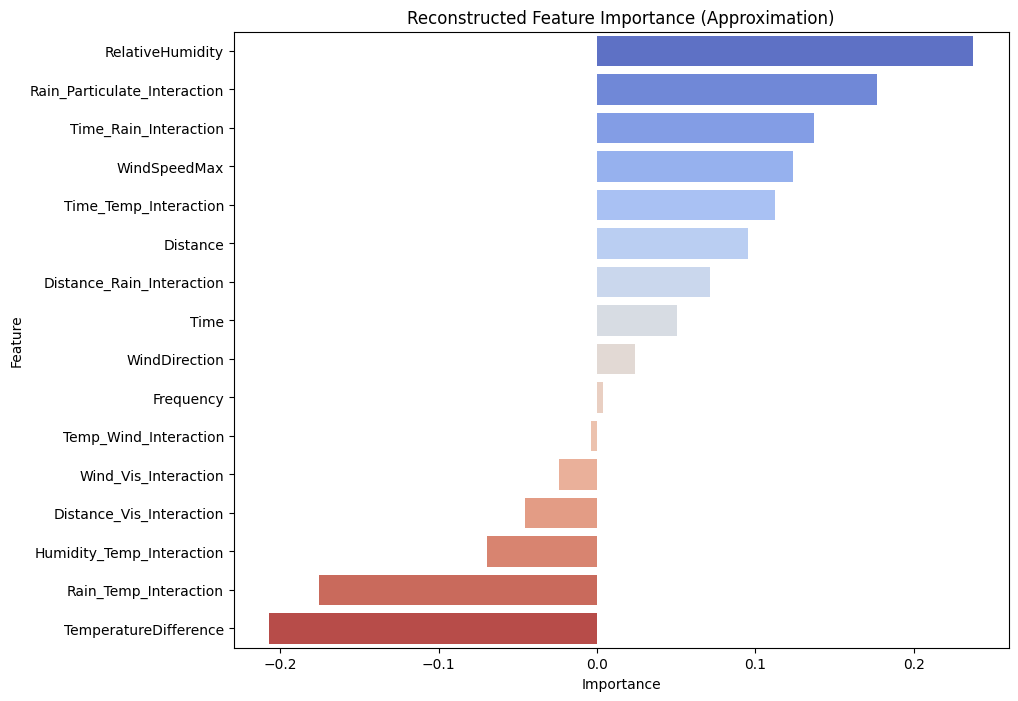

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Transposing PCA components to match the original feature space
pca_components = pca.components_


original_feature_importance = np.dot(pca_components.T, rf_fso.feature_importances_)


original_feature_importance_df = pd.DataFrame({
    'Feature': num_col_stdize,
    'Importance': original_feature_importance
}).sort_values(by='Importance', ascending=False)


print("\nReconstructed Feature Importance:")
print(original_feature_importance_df)


plt.figure(figsize=(10, 8))
sns.barplot(y=original_feature_importance_df['Feature'], x=original_feature_importance_df['Importance'], palette='coolwarm')
plt.title("Reconstructed Feature Importance (Approximation)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
